In [51]:
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt

In [52]:
nside = 256
lmax = 3*nside-1

ell, TT, EE, BB, TE = np.loadtxt('totcls_r001.txt', unpack=True)

TT = list(2*np.pi/(ell * (ell + 1))*TT)
EE = list(2*np.pi/(ell * (ell + 1))*EE)
BB = list(2*np.pi/(ell * (ell + 1))*BB)
TE = list(2*np.pi/(ell * (ell + 1))*TE)

cl = np.array([TT, EE, BB, TE])

m = hp.synfast(cl, nside, pol=True, new=True)


In [53]:
res = 0.01

In [54]:
m_smooth = hp.smoothing(m, res)

/scratch/yuyang/conda/envs/toast/lib/python3.8/site-packages/healpy/sphtfunc.py:822: UserWarning: Sigma is 14.598766 arcmin (0.004247 rad) 
  warnings.warn(
/scratch/yuyang/conda/envs/toast/lib/python3.8/site-packages/healpy/sphtfunc.py:827: UserWarning: -> fwhm is 34.377468 arcmin
  warnings.warn(


In [55]:
beam = hp.gauss_beam(res, lmax, pol=True)

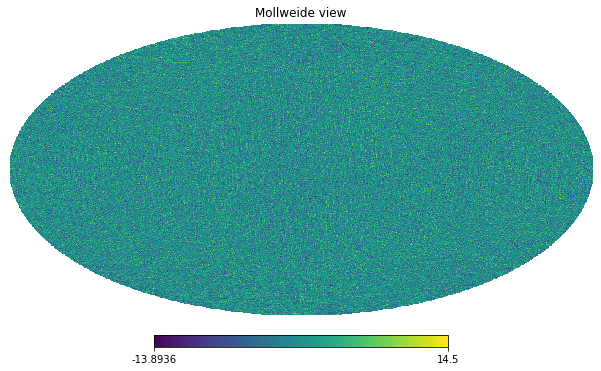

In [57]:
hp.mollview(m[1])

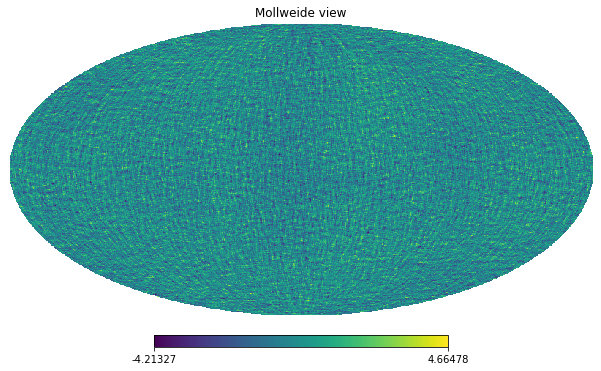

In [56]:
hp.mollview(m_smooth[1])

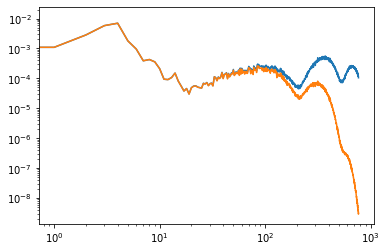

In [62]:
plt.loglog(hp.anafast(m[1], lmax=lmax))
plt.loglog(hp.anafast(m_smooth[1], lmax=lmax))